In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
prior_probs = np.array([[0.33,0.3],[0.2,0.17]])
print(prior_probs)

[[0.33 0.3 ]
 [0.2  0.17]]


In [154]:
robot_likelihoods = np.array([[0.5,0.2],[0.5,0.75]])
print(robot_likelihoods)

[[0.5  0.2 ]
 [0.5  0.75]]


In [155]:
# Step 2: Create heatmap
def create_heatmap(numpy_array):
    plt.imshow(numpy_array,cmap = 'gray',interpolation = 'nearest')
    for i in range(numpy_array.shape[0]):
        for j in range(numpy_array.shape[1]):
            plt.text(i,j,str(numpy_array[i,j]),ha = 'center',va = 'center',color = 'orange',fontsize = 20,fontweight = 'bold')
    plt.colorbar()
    plt.title('2X2 Heatmap with Values')
    plt.show()

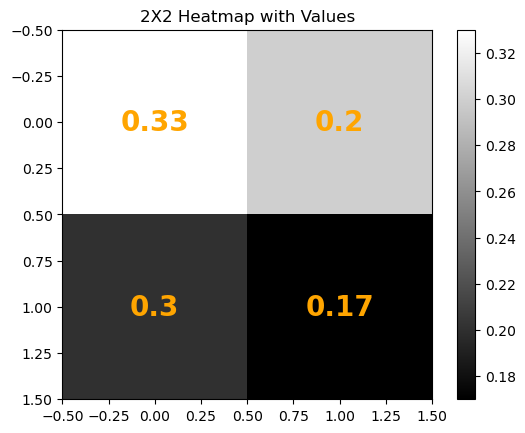

In [156]:
create_heatmap(priors)

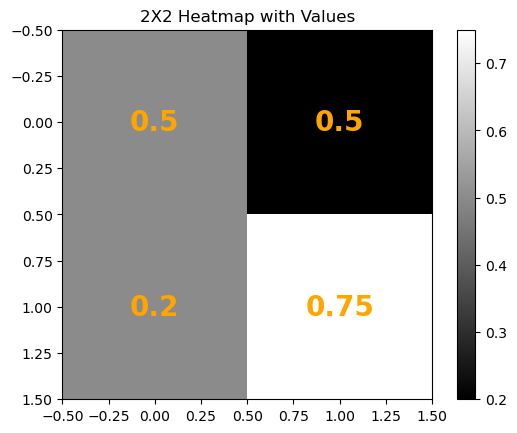

In [157]:
create_heatmap(robot_beeps)

In [218]:
def generate_treasure(prior_probs):
    u = np.random.random()
    cumulative_probs = prior_probs.flatten().cumsum()
    loc = np.where(u < cumulative_probs)[0][0]
    return loc

In [220]:
def get_robot_beep(loc, robot_likelihoods):
    i,j = loc%2, loc//2
    u = np.random.random()
    return u < robot_likelihoods[j,i]

In [222]:
def get_posterior_probs(prior_probs, robot_likelihoods, robot_beep):
    likelihoods = robot_likelihoods if robot_beep else (1-robot_likelihoods)
    posterior_probs = prior_probs*likelihoods
    return posterior_probs

In [224]:
def show_probs(robot_beep, probs):
    plt.imshow(probs, cmap='gray')
    plt.colorbar()

    for i in range(2):
        for j in range(2):
            plt.annotate(round(probs[i,j],3), (j,i), color="red", fontsize=20, fontweight='bold', ha='center', va='center')

    plt.title('Posterior Probabilities\nRobot Beep = %s'%robot_beep, fontsize=20)
    plt.show()

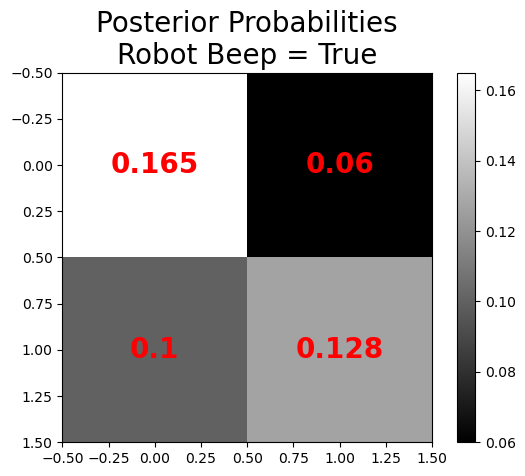

In [226]:
loc = generate_treasure(prior_probs)
robot_beep = get_robot_beep(loc, robot_likelihoods)
posterior_probs = get_posterior_probs(prior_probs, robot_likelihoods, robot_beep)
show_probs(robot_beep, posterior_probs)

In [228]:
trials = 100

actual_locs = []
prior_preds = []
robot_preds = []
posterior_preds = []

for _ in range(trials):
    loc = generate_treasure(prior_probs)
    robot_beep = get_robot_beep(loc, robot_likelihoods)
    posterior_probs = get_posterior_probs(prior_probs, robot_likelihoods, robot_beep)
    actual_locs.append(loc)
    robot_preds.append(3 if robot_beep else 1)
    posterior_preds.append(np.argmax(posterior_probs.flatten()))
    prior_preds.append(0)

In [230]:
prior_acc = np.mean(np.array(prior_preds) == np.array(actual_locs))
robot_acc = np.mean(np.array(robot_preds) == np.array(actual_locs))
posterior_acc = np.mean(np.array(posterior_preds) == np.array(actual_locs))

In [232]:
print('Prior Accuracy: %s'%prior_acc)
print('Robot Accuracy: %s'%robot_acc)
print('Posterior Accuracy: %s'%posterior_acc)

Prior Accuracy: 0.3
Robot Accuracy: 0.41
Posterior Accuracy: 0.32
